In [141]:
import numpy as np
import pandas as pd 

In [142]:
df = pd.read_csv('spam.csv',encoding= 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [144]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [146]:
df.duplicated().sum()

403

In [147]:
df.drop_duplicates(inplace= True, keep= 'first')

In [148]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/deshnasanghvi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deshnasanghvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
from nltk.tokenize import word_tokenize, sent_tokenize
df['num_characters'] = df['v2'].apply(len)
df['num_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,v1,v2,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [150]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])
df.head()

,v1,v2,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [151]:
df[['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
df[df['v1'] == 0][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [153]:
df[df['v1'] == 1][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [154]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string
from nltk.corpus import stopwords

def transform_text(v2):
    v2 = v2.lower()
    v2 = nltk.word_tokenize(v2)
    y = []
    for i in v2:
        if i.isalnum():
            y.append(i)
    v2 = y[:]
    y.clear()
    
    for i in v2:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    v2 = y[:]
    y.clear()
    
    for i in v2:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [155]:
df['transformed_text'] = df['v2'].apply(transform_text)
df.sample(5)

,v1,v2,num_characters,num_words,num_sent,transformed_text
4461,0,"Sorry I flaked last night, shit's seriously go...",95,21,1,sorri flake last night shit serious goin roomm...
1802,0,Ok lor thanx... ÌÏ in school?,29,8,1,ok lor thanx ìï school
1620,0,"Fuck babe, I miss you sooooo much !! I wish yo...",154,41,4,fuck babe miss sooooo much wish sleep bed lone...
308,1,TheMob> Check out our newest selection of cont...,138,30,1,themob check newest select content game tone g...
594,0,I met you as a stranger and choose you as my f...,147,35,4,met stranger choos friend long world stand fri...


In [156]:
spam_corpus = []
for msg in df[df['v1'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [157]:
ham_corpus = []
for msg in df[df['v1'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

In [158]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['v1'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [159]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [161]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [162]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [164]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [165]:
def train_classifers(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_predd = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predd)
    precision = precision_score(y_test, y_predd)
    return accuracy, precision

In [166]:
train_classifers(svc, X_train, X_test, y_train, y_test)

(0.9758220502901354, 0.9747899159663865)

In [167]:
accuracy = []
precision = []
for name,clf in clfs.items():
    accuracy_scoree, precision_scoree = train_classifers(clf, X_train, X_test, y_train, y_test)
    accuracy.append(accuracy_scoree)
    precision.append(precision_scoree)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [168]:
analysis = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy, 'Precision':precision }).sort_values('Precision', ascending= False)
analysis

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.927466,0.811881


In [169]:
analysis1 = pd.melt(analysis, id_vars = "Algorithm")
analysis1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.927466


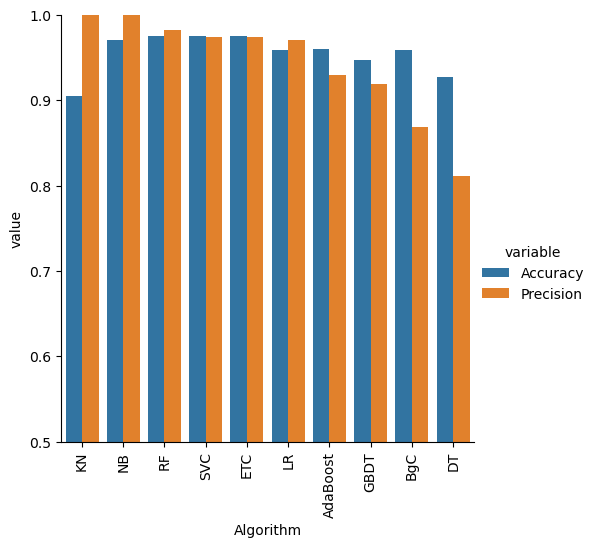

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x= 'Algorithm', y= 'value', data= analysis1, hue= 'variable', kind= 'bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [172]:
# Applying Ensemble Learning:
svc = SVC(kernel= 'sigmoid', gamma= 1, probability= True)
nb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators= 50, random_state= 2)
estimators = [('svc',svc),('nb',nb), ('etc',etc)]

from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators= estimators, voting= 'soft')
vc.fit(X_train, y_train)
y_pre = vc.predict(X_test)
print(accuracy_score(y_test, y_pre))
print(precision_score(y_test, y_pre))

0.9816247582205029
0.9917355371900827


In [174]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators= estimators, final_estimator= RandomForestClassifier())
sc.fit(X_train, y_train)
y_pree = sc.predict(X_test)
print(accuracy_score(y_test, y_pree))
print(precision_score(y_test, y_pree))

0.9816247582205029
0.9541984732824428


In [176]:
# finally we are using : # tfidf --> MNB
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))